# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [60]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [13]:
# Your code here.
x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

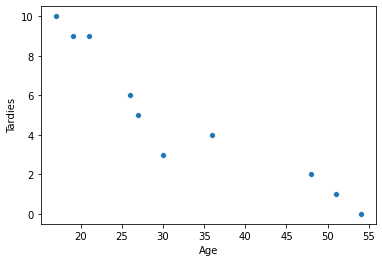

In [14]:
# Your code here.
sns.scatterplot(data=student_data, x='Age', y='Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [15]:
# Your response here. 
"""Hypothesis: The younger the student, the more often the student is late."""

'Hypothesis: The younger the student, the more often the student is late.'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [27]:
# Your response here.
#covariance
student_data.cov()

#Covariance is a measure of relationship between 2 variables that is scale dependent (how much will a variable change
#when the other variable changes?)

'Covariance is a measure of relationship between 2 variables that is scale dependent (how much will a variable change\nwhen the other variable changes?)'

In [25]:
#correlation
student_data.corr()

#Correlation  overcomes the lack of scale dependency that is present in covariance by standardizing the values
#(always between 0 and (-)1)

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [33]:
# Your response here.

#𝑌=𝛽0+𝛽1𝑋,

#outcome variable = dependent variable = target variable = Tardies
y = student_data['Tardies']

#independent variable = age
x = student_data['Age']

Plot your regression model on your scatter plot.

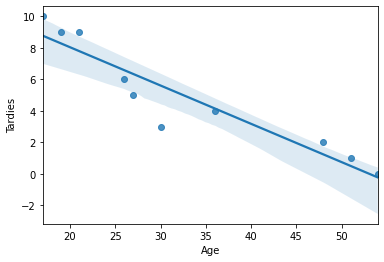

In [34]:
# Your code here.
sns.regplot(x='Age', y='Tardies', data=student_data)

In [35]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('The slope is, b1: ' + str(slope))
print('The intercept is, b0: ' + str(intercept))

The slope is, b1: -0.24282077091598084
The intercept is, b0: 12.88880336313577


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

# Your response here. 
1. When the age increases, the tardies decreases. The older, the less tardiness.
2. When the age increases with 1 unit, the tardies decreases with 0.24 unit.
3. Makes sense, since the correlation coefficient is -0.9, which indicates a very strong relationship.
4. The intercept in this case doesn't really make sense, since it's highly dependent on your parents if you're late as a baby. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set that you can download from [here](https://drive.google.com/file/d/1EyAN0RXmAM5OLzKcxyWqdExQJ3KiswO9/view?usp=sharing). Please place the data it in the provided data folder for this lab. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [ ]:
# Import any libraries you may need 

In [38]:
# Import the data
vehicles = pd.read_csv('..\\data\\vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [55]:
# Your response here
vehicles[['CO2 Emission Grams/Mile','Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']].corr()['CO2 Emission Grams/Mile'].sort_values(ascending=False)

CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Cylinders                  0.752393
Year                      -0.222300
Combined MPG              -0.926229
Name: CO2 Emission Grams/Mile, dtype: float64

#### Correlation coefficient above 0.7 indicates a (very) strong relationship. Therefore I will use:
1. Fuel Barrels/Year
2. Fuel Cost/Year
3. Cylinders
4. Combined MPG
#### in my model.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [61]:
# Your response here. 
#Because I use more than one variable, it's a multivariate linear regression.

X = vehicles[['Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
Y = vehicles['CO2 Emission Grams/Mile']

# Build
model = sm.OLS(Y,X)

# Fit
results = model.fit()  ## -> SSE/OLS Procedure 

# Predict
predictions = results.predict(X)

# Summary
print('The r-squared score of our model is:', r2_score(Y, predictions))

The r-squared score of our model is: 0.9769807684187387


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [62]:
# Your response here. 
"""The R2 is very high: 0.97. This is close to 1, so the model seems to fit very well. It makes me wonder whether soms variables
are maybe very high correlated to each other (and not only to the dependent (target) variable.)"""

'The R2 is very high: 0.97. This is close to 1, so the model seems to fit very well. It makes me wonder whether soms variables\nare maybe very high correlated to each other (and not only to the dependent (target) variable.)'

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [86]:
# Your code here. 
party_data = pd.DataFrame({'Invited': [1, 3, 4, 6, 8, 9, 11, 14], 'Attended': [1, 2, 4, 4, 5, 7, 8, 13]})
party_data['Difference'] = (party_data['Invited'] - party_data['Attended'])
party_data

,Invited,Attended,Difference
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3
7,14,13,1


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

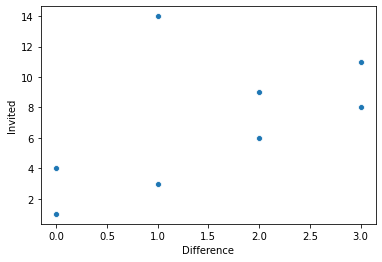

In [87]:
# Your code here.
#Invited = dependent, thus y-value
sns.scatterplot(data=party_data, x='Difference', y='Invited')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [90]:
# Your response here. 
#There seems to be a weak positive relation ship between invited and the number of people that doesn't attend
party_data.corr()

,Invited,Attended,Difference
Invited,1.000000,0.965230,0.550482
Attended,0.965230,1.000000,0.313112
Difference,0.550482,0.313112,1.000000


In [91]:
X = party_data['Invited']
Y = party_data['Attended']

# Build
model = sm.OLS(Y,X)
# Fit
results = model.fit()  ## -> SSE/OLS Procedure 
# Predict
predictions = results.predict(X)
# Summary
print('The r-squared score of our model is:', r2_score(Y, predictions))

The r-squared score of our model is: 0.9278551115102529


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?